In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from helpers.utils import *
from helpers.multi_view import estimate_essential, recons_multi, _project_multi_view

# 1. New Functions

In [3]:
# to_homogeneous(np.random.randn(3))

In [4]:
# project(np.random.randn(3, 2, 3))

# 2. Load Data

In [5]:
imgs = load_imgs()
x_img = load_data()
x_img_h = to_homogeneous(x_img)
print(f"imgs shape: {imgs.shape}, data shape: {x_img.shape}, {x_img_h.shape}")

imgs shape: (5, 806, 605), data shape: (5, 12, 2), (5, 12, 3)


In [6]:
num_frames, H, W = imgs.shape
num_pts = x_img.shape[1]
K = np.array([[100, 0, W // 2],
             [0, 100, H // 2],
             [0, 0, 1]])
# K = np.eye(3)
K_inv = np.linalg.inv(K)
x_camera = x_img_h @ K_inv.T

In [7]:
# K_inv @ x_img_h[0, 0, :]

In [8]:
E, R, T = estimate_essential(x_camera[0, :, :-1], x_camera[1, :, :-1])

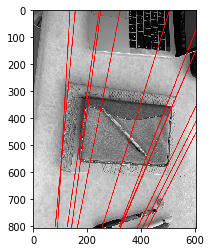

In [9]:
draw_epipolar_line(x_img[0, ...], E, imgs[1, ...], K=K)

# 3. Reconstruction

In [10]:
np.set_printoptions(precision=3, linewidth=100)

0, depth_list:
[1.    1.144 0.98  0.913 1.034 1.092 1.296 1.128 1.167 1.202 1.127 0.997]
1, depth_list:
[1.    0.85  0.753 0.651 0.752 1.059 0.972 0.881 0.904 0.936 1.034 0.664]
2, depth_list:
[1.    0.719 0.451 0.745 0.866 1.086 0.875 0.687 0.801 1.054 1.178 0.016]


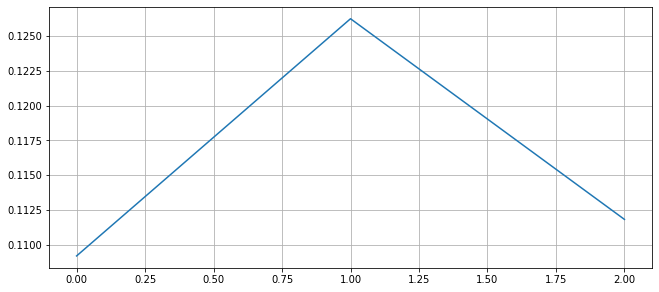

In [27]:
depth_list, R_list, T_list = recons_multi(x_camera[..., :-1], max_iter=3, if_plot=True)

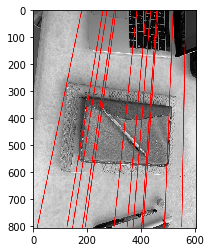

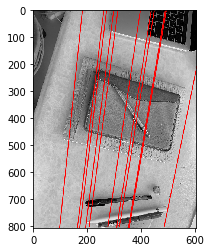

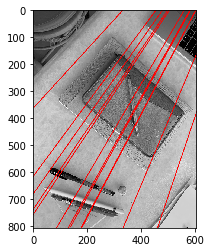

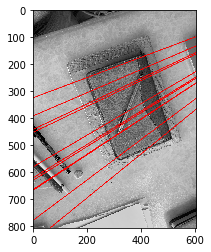

In [28]:
for i in range(1, num_frames):
    img = imgs[i, ...]
    R, T = R_list[i], T_list[i]
    E = vec2skew(T) @ R
    draw_epipolar_line(x_img[0, ...], E, img, K=K)

In [29]:
x_camera[1, ...]

array([[-1.71, -1.34,  1.  ],
       [-2.  ,  1.9 ,  1.  ],
       [ 2.02,  2.02,  1.  ],
       [ 2.26, -0.84,  1.  ],
       [ 2.09, -0.42,  1.  ],
       [-1.07, -0.81,  1.  ],
       [-1.26,  1.53,  1.  ],
       [ 1.95,  1.7 ,  1.  ],
       [ 1.17,  1.37,  1.  ],
       [ 0.51,  0.78,  1.  ],
       [-0.49, -0.43,  1.  ],
       [ 1.72,  3.  ,  1.  ]])

In [30]:
x_hat = _project_multi_view(x_camera[0, :, :-1], depth_list, R_list, T_list)
x_hat[1, ...]

array([[-1.824, -1.101],
       [-1.102,  1.091],
       [ 1.227,  1.234],
       [ 2.548, -0.864],
       [ 1.995, -0.26 ],
       [-1.031, -0.473],
       [-0.763,  1.014],
       [ 1.183,  1.144],
       [ 0.707,  0.99 ],
       [ 0.308,  0.695],
       [-0.508, -0.156],
       [ 0.864,  1.555]])

In [31]:
R, T

(array([[ 0.365, -0.878,  0.311],
        [ 0.91 ,  0.265, -0.32 ],
        [ 0.199,  0.399,  0.895]]), array([ 1.274, -0.748,  0.14 ]))

In [32]:
R_list[1], T_list[1]

(array([[ 0.992, -0.108,  0.064],
        [ 0.121,  0.96 , -0.254],
        [-0.034,  0.26 ,  0.965]]), array([ 0.062, -0.513,  0.021]))